## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train , test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape , output_units = 10 , neurons = [256 , 256 , 256 , 128]):
    """Code Here
    建立你的神經網路
    """
    inputs = keras.layers.Input(shape = input_shape)
    for i , neuron in enumerate(neurons):
      if i ==0:
        x = keras.layers.Dense(units = neuron , activation = 'relu')(inputs)
      else:
        x = keras.layers.Dense(units = neuron , activation = 'relu')(x)
    outputs = keras.layers.Dense(units = output_units , activation = 'softmax')(x)
    model = keras.models.Model(inputs = [inputs] , outputs = [outputs])
    return model

In [11]:
"""Code Here
設定超參數
"""
epochs = 20
lr = 1e-2
batch_size = 128
momentum = {0.8 , 0.9 , 0.95}

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in momentum:
  keras.backend.clear_session()
  print('momentum = %.f' %(m))
  model = build_mlp(x_train.shape[1:])
  opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
  model.compile(loss = 'categorical_crossentropy' , optimizer = opt , metrics = ['acc'])
  
  model.fit(x_train, y_train, 
            epochs = epochs, 
            batch_size = batch_size, 
            validation_data=(x_test, y_test), 
            shuffle=True)
  
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
  
  exp_name_tag = "exp-lr-%s" % str(lr)
  results[exp_name_tag] = {'train-loss': train_loss,
                           'valid-loss': valid_loss,
                           'train-acc': train_acc,
                           'valid-acc': valid_acc}

lr = 0.000010
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 119us/step - loss: 2.1613 - acc: 0.2298 - val_loss: 2.0265 - val_acc: 0.2992
Epoch 2/20
50000/50000 [==============================] - 4s 83us/step - loss: 1.9531 - acc: 0.3172 - val_loss: 1.8940 - val_acc: 0.3328
Epoch 3/20
50000/50000 [==============================] - 4s 80us/step - loss: 1.8632 - acc: 0.3475 - val_loss: 1.8328 - val_acc: 0.3501
Epoch 4/20
50000/50000 [==============================] - 4s 82us/step - loss: 1.8110 - acc: 0.3629 - val_loss: 1.7909 - val_acc: 0.3686
Epoch 5/20
50000/50000 [==============================] - 4s 87us/step - loss: 1.7730 - acc: 0.3753 - val_loss: 1.7555 - val_acc: 0.3825
Epoch 6/20
50000/50000 [==============================] - 4s 86us/step - loss: 1.7406 - acc: 0.3872 - val_loss: 1.7301 - val_acc: 0.3911
Epoch 7/20
50000/50000 [==============================] - 4s 83us/step - loss: 1.7145 - acc: 0.3962 - val_loss: 1

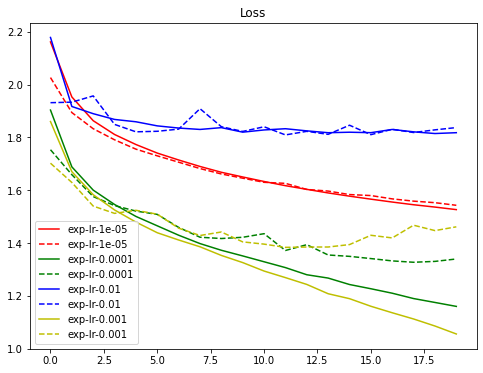

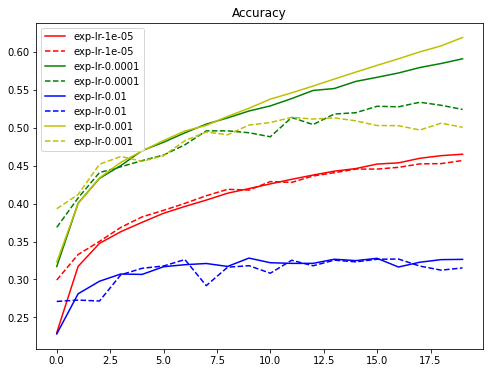

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i , cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()